**Importing Libraries**


1.   Pandas just to manipulate arrays/lists
2.   pyplot to plot graphs for visualization
3.   sklearn; to import iris datasets
4.   random; to generate initial random centroids

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import random

In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
data = iris.data
len(data[0])

4

In [ ]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
x.columns = ['sLength', 'sWidth', 'pLength', 'pWidth']

In [ ]:
def generateCentroid():
  c = list()
  c.append(random.uniform(min(x['sLength'].values), max(x['sLength'].values)))
  c.append(random.uniform(min(x['sWidth'].values), max(x['sWidth'].values)))
  return c

In [ ]:
init_c1 = generateCentroid()
init_c2 = generateCentroid()
init_c3 = generateCentroid()

print(init_c1)
print(init_c2)
print(init_c3)

[6.571656937031062, 3.7199023164912637]
[6.638063839544617, 4.151484868235361]
[6.510909032538487, 2.307042475731122]


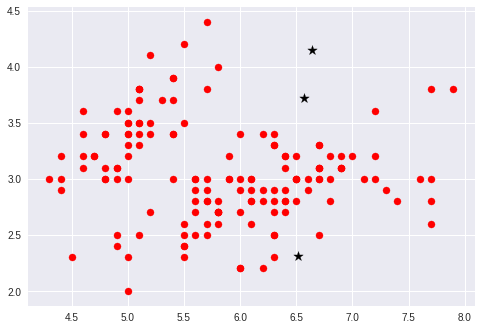

In [ ]:
plt.scatter(x['sLength'].values, x['sWidth'].values, c='#FF0000', s=50)
plt.scatter(init_c1[0], init_c1[1], marker='*', s=100, c='#000000')
plt.scatter(init_c2[0], init_c2[1], marker='*', s=100, c='#000000')
plt.scatter(init_c3[0], init_c3[1], marker='*', s=100, c='#000000')

In [ ]:
def dist(a, b):
  distance =(((a[0]-b[0])**2)+((a[1]-b[1])**2)+((a[2]-b[2])**2)+((a[3]-b[3])**2))
  return distance

In [ ]:
def dist2d(a, b):
  distance =(((a[0]-b[0])**2)+((a[1]-b[1])**2))
  return distance

In [ ]:
def diff(a, b):
  distance =((a[0]-b[0])**2)
  return distance

In [ ]:
def getnewCentroid(cluster):
  c = list()
  c = [sum(x) for x in zip(*cluster)]
  c = [x / len(cluster) for x in c]
  return c

In [ ]:
data[0][:2]

array([5.1, 3.5])

In [ ]:
c1 = init_c1
c2 = init_c2
c3 = init_c3

Oldc1 = [0,0]
Oldc2 = [0,0]
Oldc3 = [0,0]

cluster1 = list()
cluster2 = list()
cluster3 = list()
counter = 0
while(Oldc1 != c1 and Oldc2 != c2 and Oldc3 != c3):
  counter = counter + 1
  Oldc1 = list(c1)
  Oldc2 = list(c2)
  Oldc3 = list(c3)
  cluster1 = list()
  cluster2 = list()
  cluster3 = list()
  for i in range(len(data)-1):
    dist1 = dist2d(c1, data[i][:2])
    dist2 = dist2d(c2, data[i][:2])
    dist3 = dist2d(c3, data[i][:2])
    if dist1<dist2 and dist1<dist3:
      cluster1.append(data[i][:2])
    elif dist2<dist1 and dist2<dist3:
      cluster2.append(data[i][:2])
    elif dist3<dist2 and dist3<dist1:
      cluster3.append(data[i][:2])
      
  c1 = list()
  c2 = list()
  c3 = list()
  
  c1 = list(getnewCentroid(cluster1))
  c2 = list(getnewCentroid(cluster2))
  c3 = list(getnewCentroid(cluster3))


In [ ]:
data1 = pd.DataFrame(cluster1)
data2 = pd.DataFrame(cluster2)
data3 = pd.DataFrame(cluster3)

data1.columns = ['sLength', 'sWidth']
data2.columns = ['sLength', 'sWidth']
data3.columns = ['sLength', 'sWidth']

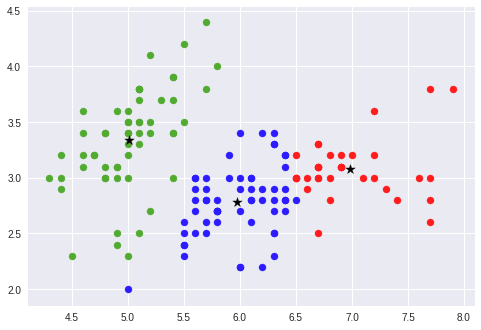

In [ ]:
plt.scatter(data1['sLength'].values, data1['sWidth'].values, c='#52AB31', s=50)
plt.scatter(data2['sLength'].values, data2['sWidth'].values, c='#FF1C1C', s=50)
plt.scatter(data3['sLength'].values, data3['sWidth'].values, c='#2C1CFF', s=50)
plt.scatter(c1[0], c1[1], marker='*', s=100, c='#000000')
plt.scatter(c2[0], c2[1], marker='*', s=100, c='#000000')
plt.scatter(c3[0], c3[1], marker='*', s=100, c='#000000')

In [ ]:
counter

5